In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Data Part**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split


review_data = load_files(r"/content/drive/My Drive/movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

#-------------------------------------------------------------------------------

u0 = []
u0_space = []

ramda = 10

gradient_u0 = []

m = len(X_train[0])

learning_rate = 0.01

for i in range(len(X_train[0])):
    gradient_u0.append(0)

for i in range(len(X_train[0])):
    u0.append(1)

for p in range(2000):
    for i in range(len(X_train)):
        mid_term0 = 0
        label = y_train[i]

        for j in range(len(X_train[0])):
            mid_term0 += X_train[i][j] * u0[j]

        mid_term0 = 1 / (1 + np.exp(-1 * mid_term0))

        for k in range(len(X_train[0])):
            gradient_u0[k] += ( ( mid_term0 - label ) * X_train[i][k] ) / m

    for i in range(len(u0)):
        u0[i] = ( ( 1 - (learning_rate * ramda) ) * u0[i] ) - (learning_rate * gradient_u0[i])
        u0_space.append(u0[i])
        gradient_u0[i] = 0

u_space = []

for i in range(2000):
    temp = u0_space[1500*i:1500*(i+1)]
    u_space.append(temp)

#-------------------------------------------------------------------------------

result_space = []
result = 0
result1_space = []
result1 = 0

for i in range(2000):
    for j in range(len(X_train)):
        label = y_train[j]
        theta_sum = 0
        result_sum = 0
        for k in range(len(X_train[0])):
            result_sum += u_space[i][k] * X_train[j][k]
            if ( j == 0 ):
                theta_sum += u_space[i][k] ** 2
        result_sum = 1 / (1 + np.exp(-1 * result_sum))
        result +=  ( (-1 * label * np.log(result_sum)) - ( (1 - label) * np.log(1-result_sum) ) ) / m
    result += (ramda / 2) * theta_sum
    result_space.append(result)
    result = 0

for i in range(2000):
    for j in range(len(X_test)):
        label = y_test[j]
        theta_sum1 = 0
        result_sum1 = 0
        for k in range(len(X_test[0])):
            result_sum1 += u_space[i][k] * X_test[j][k]
            if ( j == 0 ):
                theta_sum1 += u_space[i][k] ** 2
        result_sum1 = 1 / (1 + np.exp(-1 * result_sum1))
        result1 +=  ( (-1 * label * np.log(result_sum1)) - ( (1 - label) * np.log(1-result_sum1) ) ) / m
    result1 += (ramda / 2) * theta_sum1
    result1_space.append(result1)
    result1 = 0

#-------------------------------------------------------------------------------

correct_space = []
correct1_space = []

for i in range(2000):
    correct = 0
    for j in range(len(X_train)):
        label = y_train[j]
        result_sum = 0
        for k in range(len(X_train[0])):
            result_sum += u_space[i][k] * X_train[j][k]
        result_sum = 1 / (1 + np.exp(-1 * result_sum))
        if (result_sum >= 1/2):
            im_label = 1
        else:
            im_label = 0

        if (im_label == label):
            correct += 1
    correct_space.append( (correct / m) * 100 )

for i in range(2000):
    correct = 0
    for j in range(len(X_test)):
        label = y_test[j]
        result_sum = 0
        for k in range(len(X_test[0])):
            result_sum += u_space[i][k] * X_test[j][k]
        result_sum = 1 / (1 + np.exp(-1 * result_sum))
        if (result_sum >= 1/2):
            im_label = 1
        else:
            im_label = 0

        if (im_label == label):
            correct += 1
    correct1_space.append( (correct / m) * 100 )

#-------------------------------------------------------------------------------

label_1_num_train = 0
label_0_num_train = 0
TP_train = 0
TF_train = 0

for i in range(len(X_train)):

    label = y_train[i]
    if (label == 0):
        label_0_num_train += 1
    else:
        label_1_num_train += 1

    sum = 0
    for j in range(len(X_train[0])):
        sum += u0[j] * X_train[i][j]
    sum = 1 / (1 + np.exp(-1 * sum)) 
    
    if (sum >= 1/2):
        im_label = 1
    else:
        im_label = 0

    if (im_label == label and label == 1):
        TP_train += 1
    elif (im_label == label and label == 0):
        TF_train += 1
    else:
        continue

#-------------------------------------------------------------------------------

label_1_num_test = 0
label_0_num_test = 0
TP_test = 0
TF_test = 0

for i in range(len(X_test)):

    label = y_test[i]
    if (label == 0):
        label_0_num_test += 1
    else:
        label_1_num_test += 1

    sum = 0
    for j in range(len(X_test[0])):
        sum += u0[j] * X_test[i][j]
    sum = 1 / (1 + np.exp(-1 * sum)) 
    
    if (sum >= 1/2):
        im_label = 1
    else:
        im_label = 0

    if (im_label == label and label == 1):
        TP_test += 1
    elif (im_label == label and label == 0):
        TF_test += 1
    else:
        continue


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


**Task 1 : Plot the Loss Curve**

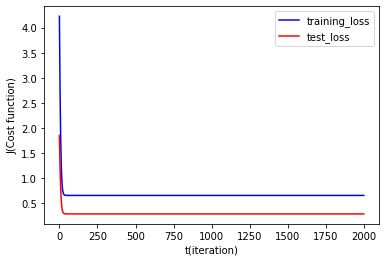

In [ ]:
x = range(2000)
plt.xlabel('t(iteration)')
plt.ylabel('J(Cost function)')
plt.plot(x, result_space, 'blue', label='training_loss')
plt.plot(x, result1_space, 'red', label='test_loss')
plt.legend(loc = 0)
plt.show()

**Task 2 - Plot the accuracy Curve**

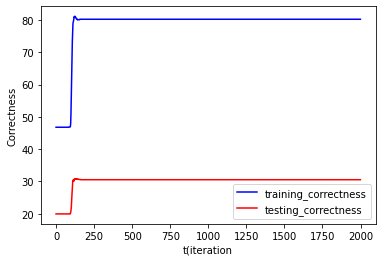

In [ ]:
x = range(2000)
plt.xlabel('t(iteration')
plt.ylabel('Correctness')
plt.plot(x, correct_space, 'blue', label='training_correctness')
plt.plot(x, correct1_space, 'red', label='testing_correctness')
plt.legend(loc = 0)
plt.show()

testing_correctness 가 잘못 출력이 되는 거 같습니다. 원인을 찾는 중입니다.
accuracy score와 다르게 출력 됨.

**Task 3 - Plot the quantitative results**

In [ ]:
print("Training data")
print("")
print("1. confusion_matrix")
print("             predicted:1     predicted:0")
print("actual:1         ", TP_train, "          ", label_1_num_train- TP_train)
print("actual:0         ", label_0_num_train-TF_train, "          ", TF_train)
print("")
print("2. classification report")
print("precision : ", TP_train / (label_0_num_train+TP_train-TF_train))
print("sensitivity : ", TP_train / label_1_num_train)
print("specificity : ", TF_train / label_0_num_train)
print("")
print("3. accuracy score")
print((TP_train+TF_train)/(label_1_num_train + label_0_num_train))
print("")
print("Testing data")
print("")
print("1. confusion_matrix")
print
print("             predicted:1     predicted:0")
print("actual:1         ", TP_test, "          ", label_1_num_test- TP_test)
print("actual:0         ", label_0_num_test-TF_test, "          ", TF_test)
print("")
print("2. classification report")
print("precision : ", TP_test / (label_0_num_test-TF_test+TP_test))
print("sensitivity : ", TP_test / label_1_num_test)
print("specificity : ", TF_test / label_0_num_test)
print("")
print("3. accuracy score")
print((TP_test+TF_test)/(label_1_num_test + label_0_num_test))

Training data

1. confusion_matrix
             predicted:1     predicted:0
actual:1          583            119
actual:0          78            621

2. classification report
precision :  0.8819969742813918
sensitivity :  0.8304843304843305
specificity :  0.8884120171673819

3. accuracy score
0.8593861527480371

Testing data

1. confusion_matrix
             predicted:1     predicted:0
actual:1          227            72
actual:0          71            231

2. classification report
precision :  0.761744966442953
sensitivity :  0.7591973244147158
specificity :  0.7649006622516556

3. accuracy score
0.762063227953411
